# <center>Uczenie maszynowe</center>

<br>

<br>

## <center>Proces rozwiązywania problemów z zastosowaniem uczenia maszynowego</center>

<img src="Grafika/CRISP_DM_Process_Diagram.png" width="350">
Źródło: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/897px-CRISP-DM_Process_Diagram.png

<br>

<br>

<br>

<br>

<br>




 <br>

## Kilka faktów na temat uczenia maszynowego

* ML to zarówno nauka jak i sztuka.

* Nie istnieje metoda "najlepsza" - każdy problem wymaga indywidualnego podejścia.

* Rozwiązanie problemu ML = reprezentacja danych + algorytm.

  - w codziennej praktyce pierwszy czynnik często niedoceniany. Przetworzanie danych jest równie ważne jak same algorytmy, a nawet często dane są ważniejsze od algorytmu - często większy wpływ na wyniki ma postać danych (ich przygotowanie/przetworzenie) niż wybór konkretnego algorytmu.

* Bardzo ważne jest zdefiniowanie celu jaki chcemy osiągnąć i rozumienie jak dane i algorytmy z tym celem się wiążą.


 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 ## Dwa główne nurty uczenia maszynowego:
* uczenie nadzorowane (*supervised learning*)
* uczenie nienadzorowane (*unsupervised learning*)

  <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Uczenie nadzorowane

Dla znanych par (X,Y) szukamy zależności między X a Y - budujemy model, który na podstawie X przewidzi Y.
 

* regresja: Y jest zmienną rzeczywistą

* klasyfikacja: Y jest zmienną dyskretną (np. binarną - o wartościach 0 i 1)

 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
 <br>
 
## Zagadnienie klasyfikacji - przykłady:
- predykcja churnu - przewidywanie na podstawie cech klienta (opisujących m.in. jego zachowanie) czy klient odejdzie w najbliższym czasie (np. w ciągu miesiąca);
- scoring kredytowy - przewidywanie czy klient ubiegający się o kredyt spłaci go w terminie;
- rozpoznawanie choroby - rozpoznawanie na podstawie parametrów medycznych czy pacjent zachoruje/jest chory;
- klasyfikacja tematyczna tekstu;
- klasyfikacja wydźwięku opini;
- rozpoznawanie zawartosci obrazów.

# Regresja logistyczna

Rozważamy problem klasyfikacji binarnej: $X \in \mathbb{R}^p$, $Y \in \{0, 1\}$.

Założenia modelu:

$$
Y =
\begin{cases}
1, \text{ z prawdopodobieństwem } \pi(x)\\
0, \text{ z prawdopodobieństwem } 1-\pi(x).\\
\end{cases}$$

, gdzie

$\pi(x)=P(Y=1 \mid x)$.

Czyli innymi słowy:

$$\large Y \sim B(\pi(x)),$$


B($\cdot$) - rozkład dwupunktowy, 


Model:

$$\large \pi(x) = \frac{1}{1+e^{-\beta x}},$$

$\beta = (\beta_0,\beta_1, \ldots, \beta_p),$   $\beta x = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p.$

 <br>
 
 <br>
 
Predykcja wartości Y przy użyciu regresji logistycznej:

$$
\hat{y} =
\begin{cases}
1, \text{ gdy } \pi(x) > 0.5\\
0, \text{ gdy } \pi(x) \leq 0.5\\
\end{cases}
$$
 
 <br>
 
 <br>
 
 <br>

Dopasowanie modelu = znalezienie optymalnych wartości współczynników wektora $\beta$, czyli takich, które najlepiej opisują zależność $Y$ od $X$. 

 <br>
 
 <br>
 
 <br>
 
Najlepiej czyli jak?
 
## Metoda największej wiarogodności
 
Rozważmy sytuację binarną. tzn. $y \in \{0,1\}$. Logarytm funkcji wiarogodności wygląda następująco (X zbiór obserwacji, Y - zbiór etykiet):

$ 
\begin{align}
L(\beta \ | \ X,Y) & = \log \prod\limits_{i=1}^n P(Y_i=y_i \ | \ x_i) \\
       & = \log \prod\limits_{i=1}^n \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i} \\
       & = \sum\limits_{i=1}^n \log\big( \pi(x_i)^{y_i}(1-\pi(x_i))^{1-y_i}\big) \\
       & = \sum\limits_{i=1}^n y_i\log(\pi(x_i)) + (1-y_i)\log(1-\pi(x_i)) .
\end{align}
$

Przyjmijmy oznaczenie: $h(\pi(x),y) = y\log{(\pi(x))} + (1-y)\log{(1-\pi(x))}.$
Zauważmy, że:

$h(\pi(x),1) = \log{(\pi(x))}$

$h(\pi(x),0) = \log{(1-\pi(x))}$

Jeżeli $y=1$ to model jest tym lepszy im $\pi(x)$ jest większe. Jeżeli $y=0$, to model jest tym lepszy im $\pi(x)$ jest mniejsze, czyli $1 - \pi(x)$ większe.

Dopasowywanie modelu regresji logistycznej polega na maksymalizacji funkcji wiarogodności (technicznie - jej logarytmu) - szukamy (numerycznie) takiego wektora $\beta$, dla którego wiarogodność jest największa.


In [1]:
import numpy as np

x1 = 0.5
x2 = 0.5
beta = np.array([-0.5, 2, -2])

prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
prob

0.3775406687981454

In [2]:
x1 = 1.5
x2 = 0.5
beta = np.array([-0.5, 2, -2])

prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
prob

0.8175744761936437

In [3]:
x1 = 0.5
x2 = 1.5
beta = np.array([-0.5, 2, -2])

# wzrost wartości cechy przy dodatnim współczynniku beta powoduje wzrost prawdopodobieństwa
# wzrost wartości cechy przy ujemnym współczynniku beta powoduje spadek prawdopodobieńswa
prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
prob

0.07585818002124355

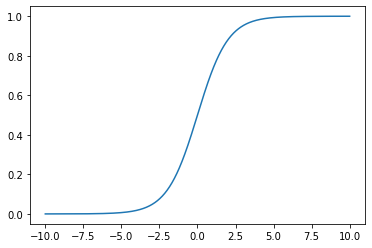

In [10]:
import matplotlib.pyplot as plt
x = np.linspace(-10,10,1000)
prob = 1 / (1 + np.exp(-x))
plt.plot(x, prob)
plt.show()

# Zrozumienie współczynnika beta -- pojęcie szansy (ang. odds)

Często pada pytanie (np. na rozmowie o pracę): jaka jest interpretacja współczynników beta? Co możemy powiedzieć o wzroście prawdopodobieństwa wraz ze wzrostem cechy, gdy beta jest równa np. 2?

In [11]:
x1 = 0.5
x2 = 1.5
beta = np.array([-0.5, 2, -2])

# wzrost wartości cechy przy dodatnim współczynniku beta powoduje wzrost prawdopodobieństwa
# wzrost wartości cechy przy ujemnym współczynniku beta powoduje spadek prawdopodobieńswa
prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
prob

0.07585818002124355

Załóżmy, że mamy prawdopodobieństwo 20%. Możemy powiedzieć, że szansa to 1 : 4. Dochodzimy do tego w ten sposób, że to jest jak 20% : 80%.

In [12]:
p = 0.2
szansa = p / (1-p)
szansa

0.25

Pokazujemy wartość prawdopodopodobieństwa oraz szansy dla jakichś ustalonych x1 i x2

In [16]:
x1 = 0.5
x2 = 0.5
beta = np.array([-0.5, 2, -2])

prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
print(prob)
szansa1 = prob/(1-prob)
print(szansa1)

0.3775406687981454
0.6065306597126333


Teraz zwiększę x1 dokładnie o 1.

In [15]:
x1 = 1.5
x2 = 0.5
beta = np.array([-0.5, 2, -2])

prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x1 - beta[2]*x2))
print(prob)
szansa2 = prob/(1-prob)
print(szansa2)

0.8175744761936437
4.4816890703380645


In [17]:
szansa2/szansa1

7.389056098930651

In [18]:
np.exp(2)

7.38905609893065

Podsumowując: szansa wzrasta $e^{\beta_1}$ razy, gdy $x_1$ wzrasta o $1$.

# Jak uruchomić model

In [19]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

In [20]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [23]:
X.shape

(569, 30)

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

dobrą praktyką jest upewnić się, czy problem jest zbalansowany (czyli czy obserwacji klasy 0 jest podobna liczba co obserwacji klasy 1)

In [26]:
y.mean() # 62% obserwacji klasy 1

0.6274165202108963

In [31]:
from sklearn.linear_model import LogisticRegression

# tworzymy zmienną reprezentującą regresję
# możemy tu podać wartości parametrów, czyli ogólne zasady jak ma się zachowywać
# na tym etapie regresja nie widziała żadnych danych, więc nawet nie wie ile
# współczynników beta będzie jej potrzebnych, a co dopiero ich wartości
model = LogisticRegression(solver="liblinear")

In [33]:
# metoda fit() jest zawsze taka sama w kazdym modelu sklearn
model.fit(X, y) # to jest ten najdłuższy moment, gdy model się uczy, czyli optymalizuje wektor beta

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model.intercept_ # wyraz wolny

array([0.37996671])

In [35]:
model.coef_

array([[ 2.06662839,  0.10495124, -0.06178838, -0.00275815, -0.14955575,
        -0.39403464, -0.63119065, -0.33211252, -0.22007734, -0.0261762 ,
        -0.02940355,  1.21668229, -0.02698377, -0.08977716, -0.01641751,
         0.00481291, -0.04811354, -0.03936309, -0.04127676,  0.00589578,
         1.21398238, -0.32840819, -0.11598269, -0.02443232, -0.277363  ,
        -1.10397218, -1.54429359, -0.64022016, -0.67330168, -0.11105572]])

In [37]:
model.coef_.shape

(1, 30)

### Dygresja: ponieważ model zazwyczaj uczy się długo, to po jego nauczeniu warto go zapisać na dysku twardym. Można to zrobić przy użyciu pakietu pickle

In [38]:
import pickle

with open("regresja.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
with open("regresja.pkl", "rb") as f:
    moj_ulubiony_model = pickle.load(f)

In [40]:
moj_ulubiony_model.coef_

array([[ 2.06662839,  0.10495124, -0.06178838, -0.00275815, -0.14955575,
        -0.39403464, -0.63119065, -0.33211252, -0.22007734, -0.0261762 ,
        -0.02940355,  1.21668229, -0.02698377, -0.08977716, -0.01641751,
         0.00481291, -0.04811354, -0.03936309, -0.04127676,  0.00589578,
         1.21398238, -0.32840819, -0.11598269, -0.02443232, -0.277363  ,
        -1.10397218, -1.54429359, -0.64022016, -0.67330168, -0.11105572]])

In [41]:
# dokonujemy predykcji
# model przewiduje
# metoda predict() jest zawsze taka sama w kazdym modelu sklearn
model.predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [45]:
# w zerowej kolumnie prawdopodobienstwo przynaleznosci do klasy 0
# w pierwszej kolumnie prawdopodobienstwo przynaleznosci do klasy 1
# "proba" to skrot od probability
model.predict_proba(X)[:5,:]

array([[1.00000000e+00, 4.42482274e-15],
       [9.99999978e-01, 2.20502493e-08],
       [9.99999949e-01, 5.05068441e-08],
       [4.79096820e-01, 5.20903180e-01],
       [9.99989627e-01, 1.03728294e-05]])

## Oceniamy klasyfikator - procent poprawnych klasyfikacji

In [46]:
from sklearn.metrics import accuracy_score

# badamy liczbę poprawnych zgadnięć (nie rozróżniamy 0 i 1, trafienie to trafienie)
accuracy_score(model.predict(X), y)

0.9595782073813708

Tak naprawdę my tutaj dokonaliśmy predykcji na dokładnie tych samych danych, na których się uczyliśmy. Czy to źle?

Niekoniecznie. Trzeba po prostu pamiętać, że to co tutaj otrzymaliśmy, to miara **dopasowania**. Pozwala ona stwierdzić, czy model w ogóle umie dopasować się do danych. Mogą być takie sytuacje, że albo dane są bardzo złe i w ogóle nie da się wyciągnąć sensownej zależności Y od X, albo też sam model może być bardzo zły dla tych konkretnych danych.

In [47]:
# from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [48]:
X.shape

(569, 30)

In [49]:
X_train.shape

(381, 30)

In [51]:
X_test.shape

(188, 30)

In [52]:
188/(381+188)

0.3304042179261863

In [54]:
# biorę zmienną, która już była nauczona
# ale w wyniku wywołania kolejnego fit, zapominamy co było
# i teraz mamy zupełnie nowe współczynniki
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
accuracy_score(model.predict(X_test), y_test) # miara predykcji, co innego niż dopasowanie

0.973404255319149

Zazwyczaj w zdrowej sytuacji model ma wysoką miarę dopasowania i lekko niższą miarę predykcji. Jeśli predykcja jest dużo niższa niż dopasowanie, to znaczy że model nie umie ogólnić danych. Oznacza to z grubsza że miał dużo stopni swobody, wygiął się do danych, ale jest to bezużyteczne dla nowych danych.

## Podzielić 10 razy dane na część treningową i testową, obliczyć miarę predykcji i wyprintować, zobaczyć, czy będzie taka sama za każdym razem

In [57]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    model = LogisticRegression(solver="liblinear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test))

0.9468085106382979
0.9414893617021277
0.9893617021276596
0.9574468085106383
0.9202127659574468
0.925531914893617
0.973404255319149
0.9521276595744681
0.9468085106382979
0.9148936170212766


### Ponieważ jak widać wyniki potrafią mocno się różnić w zależności od tego które obserwacje trafią do treningu a które na test, trzeba sobie jakoś radzić. Odpowiedzią jest cross-validacja.

In [58]:
# from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score

In [59]:
regresja = LogisticRegression(solver="liblinear")
cs = cross_val_score(regresja, X, y, cv=10) # dzielimy na 10 części
cs

array([0.94827586, 0.9137931 , 0.92982456, 0.94736842, 0.96491228,
       0.98245614, 0.94736842, 0.94642857, 0.96428571, 0.96428571])

In [60]:
cs.mean()

0.9508998790078644

# Regularyzacja

Regularyzacja - zabezpieczenie przed przeuczeniem.

### Dopasowanie modelu

<img src="Grafika/regularization.jpg" width="600">
Źródło: https://i.ytimg.com/vi/nmHNXsDPPFQ/maxresdefault.jpg


## Regularyzacja w regresji logistycznej

Regularyzacja w regresji logistycznej polega na dodaniu do celu optymalizacyjnego kary za wielkości współczynników w $\beta$.

Przypomnijmy, że w regresji logistycznej estymator wektora $\beta$ ma postać:

$$\hat{\beta} = arg \max\limits_{\beta} \sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

W oczywisty sposób jest to równoważne rozwiązywaniu problemu:

$$\hat{\beta} = arg \min\limits_{\beta} -\sum\limits_{i=1}^n h(\pi(x_i),y_i).$$

### Regresja z regularyzacją L2:

$$\hat{\beta} = arg \min\limits_{\beta} \big( -\sum\limits_{i=1}^n h(\pi(x_i),y_i) + \lambda\|\beta\|_2^2 \big),$$

$\|\beta\|_2$ - norma l2 wektora $\beta$: $\sqrt{\sum\limits_{i=1}^p\beta_i^2}$,

$\lambda$ - współczynnik regularyzacji.

Skąd wziąć wartość $\lambda$? Trzeba wyznaczyć sobie empirycznie - przetestować model  z różnymi wartościami i wybrać tę, dla której wyniki są najlepsze.



### Równie często stosowana jest norma l1: $\sum\limits_{i=1}^p|\beta_i|$. 

#### Uwaga: Norma L1 zeruje współczynniki! 


Na marginesie: w modelach w uczeniu maszynowym pojawiają sie bardzo różne formy regularyzacji, których często nawet nie będziemy świadomi.

### Jak stwierdzić czy model jest dobrze dopasowany? Czy nie za słabo, ani za mocno?

1. Gdy na zbiorze testowym niski procent poprawnych predykcji (np. 60%), a na treningowym model bardzo dobrze dopasowany (np. 90%) -> model przeuczony

2. Gdy na zbiorze treningowym model bardzo nisko dopasowany (np. rzędu pięćdziesiąt kilka procent) -> model słabo dopasowany.

Co to jest niskie dopasowanie? -> zależy od danych...

Co to jest duża różnica? -> zależy od danych... (i ich wielkości - istotność statystyczna!). Realnie, wyniki na testowym powinny być trochę niższe od dopasowania na treningowym (lub podobne). Klasyfikator w oczywisty sposób nie może działać lepiej niż dopasowanie na zbiorze treningowym - bo dopasowanie pokazuje jak dużo zależności wykrył w danych, na podstawie których będzie klasyfikował. Zatem jeżeli mamy dopasowanie na zbiorze treningowym np. 90%, to maksymalna moc predykcyjna jakiej możemy oczekiwać to 90%.

* arg max - argumenty, dla których udało się znaleźć największą wartość
* max - największa wartość, którą dało się znaleźć

Najpierw zakładamy pewne idealne współczynniki beta. Potem generujemy obserwacje na ich podstawie (zgodnie z prawdopodobieństwem $\pi$ wynikającym z wektora beta). Później wprowadzimy szum w postaci zbędnych kolumn: kolejnych potęg x. Zobaczymy, jak to wpłynie na dopasowanie z i bez regularyzacji

In [63]:
x = np.linspace(start=-1, stop=1, num = 100)
x

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [64]:
beta = np.array([-0.5, 5]) # idealne bety, które próbujemy odtworzyć. Wziąłem je z sufitu

In [65]:
prob = 1 / (1 + np.exp(-beta[0]-beta[1]*x))
prob

array([0.00407014, 0.0045008 , 0.0049768 , 0.00550286, 0.00608419,
       0.00672651, 0.00743614, 0.00822001, 0.00908576, 0.01004177,
       0.01109725, 0.01226229, 0.01354796, 0.01496639, 0.01653084,
       0.01825579, 0.02015705, 0.02225182, 0.02455883, 0.0270984 ,
       0.02989254, 0.03296501, 0.03634146, 0.04004942, 0.04411838,
       0.04857982, 0.05346719, 0.05881586, 0.06466303, 0.07104762,
       0.07801003, 0.08559186, 0.09383557, 0.10278402, 0.11247991,
       0.12296507, 0.13427977, 0.14646172, 0.15954517, 0.1735597 ,
       0.18852913, 0.20447023, 0.22139149, 0.23929188, 0.25815971,
       0.27797161, 0.29869176, 0.32027131, 0.34264818, 0.36574724,
       0.38948085, 0.41374989, 0.43844515, 0.46344916, 0.48863832,
       0.51388532, 0.53906165, 0.56404027, 0.58869807, 0.61291832,
       0.63659276, 0.65962334, 0.68192365, 0.70341983, 0.72405114,
       0.74377004, 0.76254197, 0.78034479, 0.79716791, 0.81301132,
       0.82788438, 0.84180463, 0.85479651, 0.86689013, 0.87812

In [66]:
# losujemy 100 liczb. Będzie to 1 lub 0. Prawdopodobieństwo wylosowania 1 na i-tej pozycji
# jest dane w i-tym elemencie wektora prob
y = np.random.binomial(1, prob)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

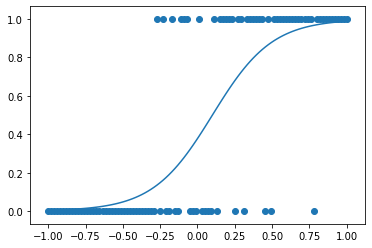

In [67]:
import matplotlib.pyplot as plt
plt.plot(x, prob)
plt.scatter(x, y)
plt.show()

In [68]:
X = np.vstack([x**p for p in range(1, 20)]).T
X.shape # mam tutaj zaszumione dane (ze zbędnymi kolumnami/cechami)

(100, 19)

In [69]:
X

array([[-1.        ,  1.        , -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.97979798,  0.96000408, -0.94061006, ..., -0.70684009,
         0.69256049, -0.67856937],
       [-0.95959596,  0.92082441, -0.88361938, ..., -0.49602433,
         0.47598295, -0.45675131],
       ...,
       [ 0.95959596,  0.92082441,  0.88361938, ...,  0.49602433,
         0.47598295,  0.45675131],
       [ 0.97979798,  0.96000408,  0.94061006, ...,  0.70684009,
         0.69256049,  0.67856937],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [70]:
# regularyzacją sterujemy przez parametr C. C to 1/lambda z poprzednich wzorów. 
# Oznacza to, że duże C to brak regularyzacji, a małe C to duża regularyzacja
model = LogisticRegression(C=100000, solver="liblinear") # bez regularyzacji
model.fit(X[:,:1], y)
model.intercept_, model.coef_

(array([-0.3865468]), array([[4.69921464]]))

In [71]:
model = LogisticRegression(C=1, solver="liblinear") # z regularyzacja, ale w granicach zdrowego rozsadku
model.fit(X[:,:1], y)
model.intercept_, model.coef_

(array([-0.25676226]), array([[3.11187346]]))

In [72]:
model = LogisticRegression(C=0.00001, solver="liblinear") # z b. silną regularyzacja, nie dopasowuje sie do danych
model.fit(X[:,:1], y)
model.intercept_, model.coef_

(array([-3.99963816e-05]), array([[0.00021634]]))

In [73]:
model = LogisticRegression(C=100000,solver="liblinear") # bez regularyzacji, na wszystkich cechach
model.fit(X, y)
# widzimy, że współczynniki przy zbędnych kolumnach (które są tylko szumem)
# są mocno różne od zera
model.intercept_, model.coef_

(array([-0.28907675]),
 array([[   1.46458373,   13.48745043,   13.68270126, -145.403741  ,
          180.42825523,   28.30854092,   -0.93759676,  -63.79077069,
          -72.65595499,  -65.32217265,  -42.00468096,  -14.07685288,
           12.62294341,   36.21428781,   53.69774544,   66.78180876,
           74.01889548,   78.15131522,   78.06497439]]))

In [74]:
model = LogisticRegression(C=1,solver="liblinear") # bez regularyzacji, na wszystkich cechach
model.fit(X, y)
# widzimy, że współczynniki przy zbędnych kolumnach (które są tylko szumem)
# są mocno różne od zera
model.intercept_, model.coef_

(array([-0.21603191]),
 array([[ 2.68256933e+00, -2.58875185e-01,  9.10629808e-01,
         -1.10070689e-01,  4.26907189e-01, -3.55312633e-02,
          2.58488321e-01, -3.37142933e-04,  1.85458652e-01,
          1.80460911e-02,  1.47019027e-01,  2.74605186e-02,
          1.23004665e-01,  3.16047658e-02,  1.05939561e-01,
          3.26685771e-02,  9.27972832e-02,  3.20233544e-02,
          8.22206396e-02]]))

In [75]:
model = LogisticRegression(C=0.01,solver="liblinear")
model.fit(X, y)
# widzimy, że współczynniki przy zbędnych kolumnach (które są tylko szumem)
# są mocno różne od zera
model.intercept_, model.coef_

(array([-0.03144254]),
 array([[ 1.87691719e-01, -7.59115320e-03,  1.01129456e-01,
         -2.79072894e-03,  6.85113581e-02, -1.02515120e-03,
          5.20415542e-02, -2.53209580e-04,  4.22055288e-02,
          1.32154101e-04,  3.56806192e-02,  3.32285920e-04,
          3.10347552e-02,  4.32696277e-04,  2.75574645e-02,
          4.77190013e-04,  2.48580055e-02,  4.90364732e-04,
          2.27036304e-02]]))

In [77]:
beta

array([-0.5,  5. ])

In [76]:
model = LogisticRegression(C=1, solver="liblinear", penalty='l1') 
model.fit(X, y)
# widzimy, że współczynniki przy zbędnych kolumnach (które są tylko szumem)
# są mocno różne od zera
model.intercept_, model.coef_

(array([-0.25125206]),
 array([[4.00551583, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]]))

In [79]:
model = LogisticRegression(C=10000, solver="liblinear", penalty='l2') 
model.fit(X, y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

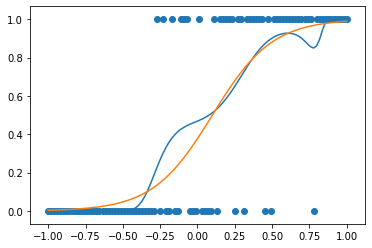

In [80]:
plt.plot(x, 1/(1+np.exp(-model.intercept_ - np.dot(X, model.coef_.T))))
plt.plot(x, prob)
plt.scatter(x,y)
plt.show()

# Rysujemy te krzywe dla różnych C. W plot() należy podać argument "label", a potem wywołać plt.legend()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


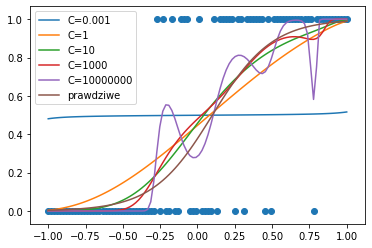

In [81]:
for c in [0.001, 1, 10, 1000, 10000000]:
    model = LogisticRegression(C=c, solver="liblinear")
    model.fit(X, y)
    plt.plot(x, 1/(1+np.exp(-model.intercept_ - np.dot(X, model.coef_.T))),
            label=f"C={c}")

plt.plot(x, prob, label="prawdziwe")
plt.scatter(x,y)
plt.legend()
plt.show()

## Przygotowanie danych - bardzo ważna sprawa!!!

Czy wartości zmiennych mają wpływ na wynik modelu?

Wyobraźmy sobie dwie zmienne, gdzie jedna ma wielkości rzędu 1, a druga rzędu 100, a rzeczywisty współczynnik przy pierwszej wynosi 1, a przy drugiej 0.01.

Jak konsekwencje będzie miało zastosowanie regularyzacji?

Zmienna pierwsza zostanie dużo mocniej "ukarana" niż druga, tzn. model mocno "ściągnie" współczynnik przy pierwszej, a zostawi przy drugiej...

Jak temu zaradzić? -> skalowanie, standaryzacja

* zarobki: 5000 -> 5001 - niewielka zmiana, niewielki wzrost szansy, więc i beta mała
* wzrost: 1.67 -> 2.67 - wielka zmiana, wielki wzrost szansy, więc i beta duża

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [83]:
# do tej model miał dwie metody: fit i predict (ew. fit_predict)
# teraz poznajemy pierwszego transformera
# a te mają dwie metody: fit i transform (i ew. fit_transform)
# tu po raz pierwszy może być przeciek danych: średniej i odchylenia standardowego
# musimy nauczyć się na zbiorze treningowym zarówno średniej jak i odchylenia. Od tego jest metoda fit()
# a potem na testowej nadal używamy średniej i odchylenia z treningowej (podczas transform())
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
# możemy odzyskać nauczoną średnią i odchylenie
sc.mean_

array([1.39897743e+01, 1.93637533e+01, 9.10664304e+01, 6.43409186e+02,
       9.63575853e-02, 1.03800131e-01, 8.72950071e-02, 4.79530472e-02,
       1.81055118e-01, 6.30433858e-02, 4.08242257e-01, 1.26486903e+00,
       2.88772940e+00, 4.02480551e+01, 7.21472966e-03, 2.57907953e-02,
       3.22173850e-02, 1.18954278e-02, 2.06690236e-02, 3.87028898e-03,
       1.61221339e+01, 2.58372703e+01, 1.06268871e+02, 8.66785564e+02,
       1.32340866e-01, 2.51834068e-01, 2.67805732e-01, 1.12866879e-01,
       2.89015223e-01, 8.41710761e-02])

In [87]:
sc.scale_ # odchylenia standardowe

array([3.53555464e+00, 4.23548692e+00, 2.44190642e+01, 3.49959353e+02,
       1.36500856e-02, 5.26293143e-02, 8.02161753e-02, 3.84686214e-02,
       2.76173764e-02, 6.94698136e-03, 2.76369621e-01, 5.87272231e-01,
       2.00182625e+00, 4.38680921e+01, 3.20968678e-03, 1.79405614e-02,
       3.28387894e-02, 6.60781965e-03, 8.10806322e-03, 2.78184928e-03,
       4.88377551e+00, 6.02062168e+00, 3.40049473e+01, 5.68246179e+02,
       2.17026913e-02, 1.52180931e-01, 2.09253249e-01, 6.55225443e-02,
       5.92166836e-02, 1.77492797e-02])

In [89]:
sc.transform(X_train) # użycie w praktyce: dostajemy być może nowe dane i je przekształcamy, tak jak się nauczyliśmy wcześniej na danych treningowych

array([[ 0.73827899,  2.05790902,  0.70574242, ...,  0.44157505,
        -1.1350724 , -0.33641231],
       [-0.70138197,  1.07809251, -0.67760297, ..., -0.24933219,
        -1.31407601,  0.17741136],
       [ 0.18391053, -0.59349806,  0.12873424, ..., -0.52786227,
        -0.73484735, -1.02601775],
       ...,
       [-0.1470135 , -1.25221808, -0.15342236, ...,  0.31490109,
         0.5688393 ,  0.51207283],
       [ 1.49346461,  1.67778743,  1.50839398, ...,  1.00168761,
         1.32031671,  1.58479241],
       [-1.41131302, -1.17194395, -1.42128421, ..., -1.51057747,
         0.17030297, -0.34542676]])

In [90]:
sc.transform(X_train).mean(axis=0)

array([-4.75326981e-15, -3.22226935e-15, -2.71582115e-16,  7.22664856e-17,
        4.88556410e-15, -5.05282605e-16, -4.54579506e-16,  9.27225634e-16,
        1.89670385e-15, -7.12465957e-16, -3.00721827e-16,  7.51986691e-16,
        4.61281640e-16,  1.27049144e-16, -4.70788471e-17, -2.52349905e-16,
        8.98085922e-16,  6.67882197e-16, -2.29008996e-15,  2.98973444e-16,
        2.96292591e-15,  3.87936985e-15, -1.73847521e-15, -9.02748276e-16,
        3.32076157e-15,  4.01545230e-16,  8.85264449e-16,  3.35689481e-16,
       -9.25185854e-18, -2.28397062e-15])

In [91]:
sc.transform(X_train).std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
sc.transform(X_test).mean(axis=0), sc.transform(X_test).std(axis=0)

(array([ 0.11772121, -0.05295382,  0.11187219,  0.09928316,  0.00059775,
         0.03110326,  0.05675831,  0.07600974,  0.01169819, -0.10707738,
        -0.03362257, -0.24745562, -0.0327635 ,  0.00614204, -0.16383944,
        -0.05274554, -0.02983101, -0.04547838, -0.04730413, -0.08201747,
         0.09113419, -0.08045648,  0.08832291,  0.07348866,  0.00386685,
         0.04834759,  0.0633912 ,  0.0803432 ,  0.05419495, -0.038411  ]),
 array([0.98273548, 1.04261309, 0.97808936, 1.01090398, 1.0866217 ,
        1.00753738, 0.97736838, 1.02153772, 0.9748417 , 1.04231888,
        1.00726327, 0.77346976, 1.02699579, 1.1055934 , 0.77413019,
        0.99091938, 0.72503836, 0.77874053, 1.05466294, 0.83812006,
        0.96276627, 1.05723963, 0.95831862, 1.00144308, 1.14778225,
        1.09603456, 0.98684084, 1.00485683, 1.12661351, 1.04920888]))

## Pipeline

Gdy budowanie modelu składa się w rzeczywistości z dwóch kroków lub więcej - np. transformacja zmiennych, a potem dopasowanie modelu, to przydają się pipeline'y.

In [94]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("standaryzacja", StandardScaler()),
                 ("regresja", LogisticRegression(solver="liblinear"))])
# pipe zachowuje się jak zwykły model, ma metody fit() i predict()
pipe.fit(X_train, y_train) # uruchamia się fit ze Scalera i z Regresji

Pipeline(memory=None,
         steps=[('standaryzacja',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regresja',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [95]:
pipe.predict(X_test) # pod spodem uruchamia się transform ze Scalera i predict z Regresji

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [96]:
# jak odzyskać średnią i std z nauczonego scalera w pipeline?

pipe.steps

[('standaryzacja', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('regresja',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False))]

In [97]:
pipe.steps[0] # krotka, więc jeszcze nie to co chcemy

('standaryzacja', StandardScaler(copy=True, with_mean=True, with_std=True))

In [99]:
pipe.steps[0][1]

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
pipe.steps[0][1].mean_

array([1.39897743e+01, 1.93637533e+01, 9.10664304e+01, 6.43409186e+02,
       9.63575853e-02, 1.03800131e-01, 8.72950071e-02, 4.79530472e-02,
       1.81055118e-01, 6.30433858e-02, 4.08242257e-01, 1.26486903e+00,
       2.88772940e+00, 4.02480551e+01, 7.21472966e-03, 2.57907953e-02,
       3.22173850e-02, 1.18954278e-02, 2.06690236e-02, 3.87028898e-03,
       1.61221339e+01, 2.58372703e+01, 1.06268871e+02, 8.66785564e+02,
       1.32340866e-01, 2.51834068e-01, 2.67805732e-01, 1.12866879e-01,
       2.89015223e-01, 8.41710761e-02])

In [101]:
pipe["standaryzacja"].mean_ # można też po nazwie

array([1.39897743e+01, 1.93637533e+01, 9.10664304e+01, 6.43409186e+02,
       9.63575853e-02, 1.03800131e-01, 8.72950071e-02, 4.79530472e-02,
       1.81055118e-01, 6.30433858e-02, 4.08242257e-01, 1.26486903e+00,
       2.88772940e+00, 4.02480551e+01, 7.21472966e-03, 2.57907953e-02,
       3.22173850e-02, 1.18954278e-02, 2.06690236e-02, 3.87028898e-03,
       1.61221339e+01, 2.58372703e+01, 1.06268871e+02, 8.66785564e+02,
       1.32340866e-01, 2.51834068e-01, 2.67805732e-01, 1.12866879e-01,
       2.89015223e-01, 8.41710761e-02])

In [102]:
pipe["regresja"].coef_ # można też po nazwie

array([[-4.98760487e-01, -3.97620157e-01, -4.80870085e-01,
        -5.74511978e-01, -6.18175233e-02,  5.92721825e-01,
        -5.13124599e-01, -7.57779872e-01, -1.07023747e-01,
         4.31971996e-01, -1.12301960e+00, -3.34525946e-02,
        -8.25392659e-01, -8.22960300e-01, -1.66235789e-01,
         6.69090347e-01, -1.10420787e-03, -3.52966695e-01,
         6.51374648e-01,  5.01799317e-01, -8.97866293e-01,
        -1.05305549e+00, -8.42293268e-01, -9.05379628e-01,
        -5.15219377e-01,  2.94146470e-02, -6.86209193e-01,
        -1.07958470e+00, -9.19839378e-01, -2.58473520e-01]])

# Optymalizacja parametrów

GridSearch - próbowanie wszystkich możliwych kombinacji parametrów dla modelu

In [107]:
from sklearn.model_selection import GridSearchCV

# tu tak naprawdę definiujemy rodzinę modeli - po prostu scaler+regresja
pipe = Pipeline([("standaryzacja", StandardScaler()),
                 ("regresja", LogisticRegression(solver="liblinear"))])

# tu definiujemy, dla jakich różnych wartości parametrów będziemy testować naszą rodzinę
# każda możliwa kombinacja będzie testowana
# tutaj jest 2*2*4 kombinacji i tyle też będzie wyników
param_grid = {"standaryzacja__with_mean": [True, False],
              "regresja__penalty": ["l1", "l2"],
              "regresja__C": 10.0**np.arange(-2, 2, 1)
             }

# tutaj definiujemy: rodzinę modeli i możliwe wartości parametrów
# a także cv (na ile dzielimy części zbiór, tak jak w cross-validacji)

# ważny parametr: refit (domyślnie ustawiony na True, czyli tak jak chcemy)
# oznacza on, że dla najlepszej kombinacji parametrów model jest jeszcze raz
# przeuczany na całym zbiorze danych
gs = GridSearchCV(pipe, param_grid, cv=5)

# dla każdej kombinacji parametrów będziemy:
#    robić cross-validację (dzielenie na cv części, większość do treningowej, jedna do testowej)
#    zapisywać uśredniony wynik cross-validacji dla danej kombinacji parametrów
# to jest ta czasochłonna metoda
gs.fit(X, y)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standaryzacja',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regresja',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi

In [109]:
gs.cv_results_

{'mean_fit_time': array([0.00184507, 0.00195999, 0.00198774, 0.00209827, 0.00187569,
        0.0022768 , 0.00162354, 0.00154777, 0.00171895, 0.00180407,
        0.00192399, 0.00188923, 0.00292645, 0.00239382, 0.0018393 ,
        0.00202312]),
 'std_fit_time': array([0.0003048 , 0.00016249, 0.00029178, 0.00029559, 0.0003643 ,
        0.00028604, 0.00017549, 0.00013559, 0.00025606, 0.0002987 ,
        0.00045071, 0.00044461, 0.00100114, 0.00080952, 0.00035387,
        0.00048404]),
 'mean_score_time': array([0.00060015, 0.00063782, 0.00072889, 0.00078006, 0.00066323,
        0.00068111, 0.00048399, 0.00052347, 0.00057364, 0.00050125,
        0.00060177, 0.00051684, 0.00061092, 0.00047455, 0.00052276,
        0.00059853]),
 'std_score_time': array([1.71135348e-04, 1.33451328e-04, 8.57198052e-05, 2.95935582e-04,
        2.55963033e-04, 1.60855303e-04, 4.92115815e-05, 1.15864620e-04,
        1.46523687e-04, 6.65283709e-05, 1.26833396e-04, 4.98066398e-05,
        6.55696347e-05, 6.63346473e-

In [108]:
# to są uśrednione wartości mean z cross-validacji dla każdej kombinacji parametrów 2*2*4
gs.cv_results_["mean_test_score"]

array([0.54, 0.54, 0.65, 0.81, 0.79, 0.84, 0.7 , 0.76, 0.77, 0.78, 0.74,
       0.76, 0.72, 0.69, 0.75, 0.75])

In [110]:
# to są uśrednione wartości odchylenia std. z cross-validacji dla każdej kombinacji parametrów 2*2*4
gs.cv_results_["std_test_score"]

array([0.012273  , 0.012273  , 0.18506925, 0.2347403 , 0.20858516,
       0.21017715, 0.1877515 , 0.21829023, 0.22770733, 0.23205738,
       0.21366007, 0.22505694, 0.21645006, 0.20162001, 0.22416652,
       0.22416652])

In [112]:
gs.cv_results_["params"]

[{'regresja__C': 0.01,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': True},
 {'regresja__C': 0.01,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': False},
 {'regresja__C': 0.01,
  'regresja__penalty': 'l2',
  'standaryzacja__with_mean': True},
 {'regresja__C': 0.01,
  'regresja__penalty': 'l2',
  'standaryzacja__with_mean': False},
 {'regresja__C': 0.1,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': True},
 {'regresja__C': 0.1,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': False},
 {'regresja__C': 0.1,
  'regresja__penalty': 'l2',
  'standaryzacja__with_mean': True},
 {'regresja__C': 0.1,
  'regresja__penalty': 'l2',
  'standaryzacja__with_mean': False},
 {'regresja__C': 1.0,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': True},
 {'regresja__C': 1.0,
  'regresja__penalty': 'l1',
  'standaryzacja__with_mean': False},
 {'regresja__C': 1.0,
  'regresja__penalty': 'l2',
  'standaryzacja__with_mean': True},
 {'regresja__C': 1.0,
 

In [111]:
gs.cv_results_["params"][0]

{'regresja__C': 0.01,
 'regresja__penalty': 'l1',
 'standaryzacja__with_mean': True}

In [113]:
gs.cv_results_["params"][np.argmax(gs.cv_results_["mean_test_score"])]

{'regresja__C': 0.1,
 'regresja__penalty': 'l1',
 'standaryzacja__with_mean': False}

In [114]:
gs.best_estimator_ # najlepszy estymator, jeśli refit=True (domyślnie jest), to został od nowa nauczony na pełnym zbiorze

Pipeline(memory=None,
         steps=[('standaryzacja',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('regresja',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [115]:
gs.best_params_ # parametry najlepszego estymatora

{'regresja__C': 0.1,
 'regresja__penalty': 'l1',
 'standaryzacja__with_mean': False}

# Drzewo decyzyjne

Załóżmy, że mamy dwie zmienne ($X[0], X[1]$) i problem klasyfikacji binarnej ($Y \in \{0,1\}$).

![Drzewo decyzyjne](Grafika/decision_tree.png)

## Jak rośnie drzewno?

Drzewo rośnie od korzenia - tzn. budujemy model od góry. Będąc w aktualnym węźle szukamy najlepszego podziału - rozpatrujemy wszystkie zmienne ze wszystkimi możliwymi podziałami i tworzymy rozgałęzienie według najlepszej opcji.

Co to znaczy najlpszy podział? Rozważmy klasyfikację binarną.

<br>

<br>

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Giniego $g(p) = 2p(1-p)$:

$$\frac{n_1}{N}g(p_1) + \frac{n_2}{N}g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $N = n_1 + n_2$, $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

![Drzewo decyzyjne](Grafika/gini_entropy.png)

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -p\log{(p)} - (1-p)\log{(1-p)}$:

$$\frac{n_1}{N} h(p_1) + \frac{n_2}{N}h(p_2),$$

gdzie $p_1, p_2$ - procent obserwacji, dla których $Y=1$ w dzieciach 1 i 2.

## Do kiedy tworzymy nowe podziały? 

Możliwe są różne warunki stopu. Najpopularniejsze to:

- maksymalna głębokość drzewa,
- minimalna liczba obserwacji w liściu.

Często stosowane w połączeniu.

## Drzewo jest odporne na różne zakresy zmiennych, innymi słowy nie trzeba robić standaryzacji/skalowania.

## Gini

In [117]:
x1 = 96
x2 = 104
p = x1/(x1+x2)
gini = 2 * p * (1-p)
gini

0.4992

In [118]:
x1 = 25
x2 = 175
p = x1/(x1+x2)
gini = 2 * p * (1-p)
gini

0.21875

In [119]:
x1 = 5
x2 = 195
p = x1/(x1+x2)
gini = 2 * p * (1-p)
gini

0.04875

# Rysowanie drzewa decyzyjnego

# Python

In [116]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
sklearn.tree.export_graphviz(model,out_file='tree.dot') 

# Terminal

## Instalacja

```
sudo apt install graphviz
sudo apt-get -f install
sudo apt install graphviz
```

## Wygenerowanie rysunku

``` 
dot -Tpng tree.dot -o tree.png
```

#### Zadanie 

Wczytaj zbiór `zbiór1.txt` (funkcja loadtxt w numpy) i podziel go na część uczącą (200 obserwacji) i testową (100). Dopasuj model regresji logistycznej na zbiorze uczącym i oblicz accuracy na zbiorze testowym. Następnie oblicz procent poprawnych dopasowań na zbiorze treningowym.

Następnie narysuj 4 histogramy wartości obu zmiennych w pozbiorach wyznaczonych przez wartość $Y$. Czy widzisz jakąś zależność między zmiennymi objaśniającymi a zmienną objaśnianą?

Następnie zbuduje drzewo klasyfikacyjne i policz dla niego accuracy.

In [120]:
dane = np.loadtxt("Dane/zbior1.txt")

In [122]:
dane.shape

(300, 3)

In [126]:
X = dane[:, :2]
y = dane[:, 2]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100)

In [140]:
regresja = LogisticRegression(solver="liblinear")
regresja.fit(X, y)
accuracy_score(regresja.predict(X), y)

0.68

In [131]:
regresja = LogisticRegression(solver="liblinear")
regresja.fit(X_train, y_train)
accuracy_score(regresja.predict(X_test), y_test)

0.4

In [141]:
drzewo = DecisionTreeClassifier()
drzewo.fit(X, y)
accuracy_score(drzewo.predict(X), y)

1.0

In [142]:
drzewo = DecisionTreeClassifier()
drzewo.fit(X_train, y_train)
accuracy_score(drzewo.predict(X_test), y_test)

0.98

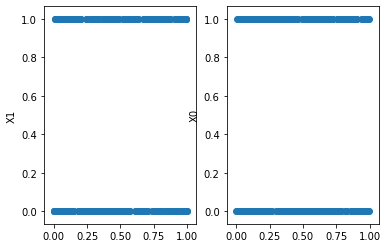

In [147]:
plt.subplot(1, 2, 1)
plt.scatter(X[:,1], y)
plt.ylabel('X1')
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], y)
plt.ylabel('X0')
plt.show()

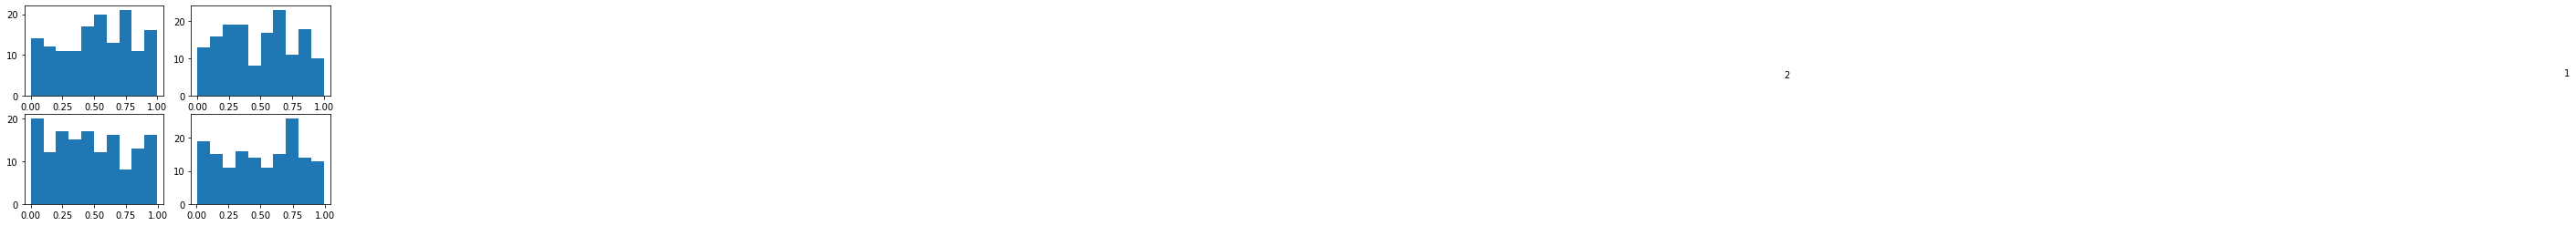

In [150]:
plt.subplot(221)
plt.hist(X[y==0,0],)
plt.text(20,5,"1")
plt.subplot(222)
plt.hist(X[y==1,0],)
plt.text(12.5,5,"2")

plt.subplot(223)
plt.hist(X[y==0,1],)
plt.subplot(224)
plt.hist(X[y==1,1],)
plt.show()

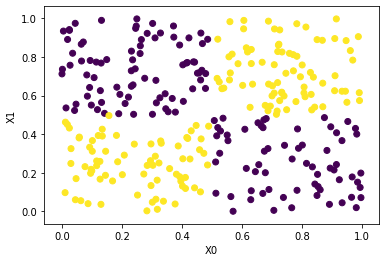

In [151]:
plt.scatter(X[:,1], X[:,0], c=y)
plt.ylabel('X1')
plt.xlabel('X0')
plt.show()

### Bardzo ważna sprawa: wnioskowanie o zależności zmiennych na podstawie analizy jednowymiarowej nie nie ma większego sensu!

- jeśli nie widać zależności, to nie znaczy, że jej nie ma,
- jeżeli widać zależność, to wcale nie musi oznaczać zależności przyczynowo-skutkowej (dana cecha może być skorelowana z inną cechą, która faktycznie wpływa na y).
- zjawisko fałszywej korelacji - statystycznie rzecz biorąc, regularnie zdarzaja się sytuacje, kiedy zmienne wyglądają na zależne, a tak naprawde nie są...

#### Naturalnie analiza wielowymiarowa (model) też może nie wykryć zależności... Sztuka analizy danych polega między innymi na szukaniu tych zależności.

# Klasyfikacja wieloklasowa

## Regresja logistyczna

*(dokładniejszy opis: https://en.wikipedia.org/wiki/Multinomial_logistic_regression)*


\begin{align}
\Pr(Y_i=1) &= \frac{1}{1+Z} e^{\boldsymbol\beta_1 \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=2) &= \frac{1}{1+Z} e^{\boldsymbol\beta_2 \cdot \mathbf{X}_i} \, \\
\cdots & \cdots \\
\Pr(Y_i=K-1) &= \frac{1}{1+Z} e^{\boldsymbol\beta_{K-1} \cdot \mathbf{X}_i} \, \\
\Pr(Y_i=K) &= \frac{1}{1+Z} \, \\
\end{align}


$Z = \sum_{k=1}^{K-1} e^{\boldsymbol\beta_k \cdot \mathbf{X}_i}$

### Definicja alternatywna
:

$$[P(Y=1), P(Y=2), \ldots , P(Y=K)] = softmax([\beta_1x_1, \beta_2x_2, \ldots , \beta_Kx_K]) = 
[\frac{e^{\beta_1x_1}}{\sum_{k=1}^{K}e^{\beta_kx_k}}, \frac{e^{\beta_2x_2}}{\sum_{k=1}^{K}e^{\beta_kx_k}}, \ldots, \frac{e^{\beta_Kx_K}}{\sum_{k=1}^{K}e^{\beta_k x_k}}]$$

Na marginesie: w uczeniu maszynowym często pojawia sie funkcja "softmax".

$$softmax(\mathbf{x}) = [\frac{e^{x_1}}{\sum_{k=1}^{p}e^{x_k}}, \frac{e^{x_2}}{\sum_{k=1}^{p}e^{x_k}}, \ldots, \frac{e^{x_p}}{\sum_{k=1}^{p}e^{x_k}}]$$



## Drzewo decyzyjne

Przyjmujemy oznaczenie: $p = (p_1, p_2, \ldots, p_K)$ wektor prawdopodobieństw poszczególnych klas (procent obserwacji danej klasy).

Opcja nr 1: Gini impurity (Miara Gini'ego niespójności węzła):
- wybieramy podział, który minimalizuje ważoną miarę Gini'ego $g(p) = \big( 1 - \sum\limits_{k=1}^K p_k^2 \big)$:

$$\frac{n_1}{N} g(p_1) + \frac{n_2}{N} g(p_2),$$

gdzie $n_1, n_2$ liczności w pierwszym i drugim dziecku, $p_1, p_2$ - rozkłady klas w dzieciach.

<br>

Opcja nr 2: Entropia.
- wybieramy podział, który daje najmniejszą wartość ważonej entropii $h(p) = -\sum\limits_{k=1}^K p_k\log p_k$:

$$\frac{n_1}{n}\sum\limits_{i=1}^{n_1} h(p_1) + \frac{n_2}{n}\sum\limits_{i=1}^{n_2} h(p_2)$$


# Jeszcze raz to samo:

Jak mamy model, który w swej naturze ładnie się uogólnia do wielu klas (np. drzewo decyzyjne), to nie musimy korzystać z żadnych sztuczek. Po prostu trenujemy jeden model, który obsługuje wiele klas i już.

A jak mamy model, który w swej naturze jest tylko dla problemu binarnego (np. regresja logistyczna, ale jutro poznamy też SVM), to musimy uciekać się do sztuczek, żeby z problemu klasyfikacji binarnego przejść do wieloklasowego (kosztem wytrenowania większej liczby modeli, a to kosztuje nas czas):

Niech liczba klas to $k$:

* one-vs-rest: tyle modeli, ile klas (czyli k), a potem wybieramy najbardziej pewny swej odpowiedzi model (np. 1 vs nie 1, 2 vs nie 2, gdzie "nie 2" to np. {1,3})
* one-vs-one: modeli jest $\frac{k*(k-1)}{2}$, i uczą się one rozróżniać 1 od 2, 1 od 3, 2 od 3. Potem wybieramy klasę z największą liczbą głosów

#### Zadanie

Wygenerować predykcje kroswalidacyjnie dla regresji logistycznej i drzewa decyzyjnego (użyj `cross_val_predict`), a następnie wypisz accuracy i przedstaw tablicę klasyfikacji (`confusion_matrix` z `sklearn.metrics`) dla obu modeli.

In [154]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [155]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [157]:
m = LogisticRegression(solver="liblinear")
m.fit(X,y)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
m.intercept_ # są wytrenowane 3 regresje (bo są 3 klasy, one-vs-rest), każda ma swój wyraz wolny

array([ 0.26421853,  1.09392467, -1.21470917])

In [160]:
m.coef_ # pierwszy wiersz to wektor beta dla pierwszej regresji (1 vs nie 1)

array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
       [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
       [-1.70751526, -1.53427768,  2.47096755,  2.55537041]])

In [161]:
m.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [163]:
accuracy_score(m.predict(X), y)

0.96

In [164]:
from sklearn.model_selection import cross_val_predict

In [166]:
pred1 = cross_val_predict(LogisticRegression(), X, y, cv=3)
pred2 = cross_val_predict(DecisionTreeClassifier(), X, y, cv=3)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/skl

In [167]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [168]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion_matrix(y, pred1)

array([[50,  0,  0],
       [ 0, 44,  6],
       [ 0,  2, 48]])

# Naiwny klasyfikator Bayes'a

Rozważmy klasyfikację wieloklasową - $Y \in \{1, 2, \ldots, K\}$. 

Naiwny klasyfikator Bayesa klasyfikuje obserwacje na podstawie prawdopodobieństwa:

$$p(Y = k \mid x_1, \dots, x_p)  = p(C_k \mid x_1, \dots, x_p).$$

Predykcja klasyfikatora to najbardziej prawdopodobna klasa.

Skąd klasyfikator bierze to prawdopodobieństwo? Oblicza je przyjmując pewne założenia...

Z twierdzenia Bayesa:


$$p(C_k \mid \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} \mid C_k)}{p(\mathbf{x})}.$$

Zauważmy, że $p(\mathbf{x})$, czyli rozkład X, jest nieistotny dla klasyfikatora, zatem: 

$$p(C_k \mid \mathbf{x}) \sim p(C_k) \ p(\mathbf{x} \mid C_k).$$

$p(C_k)$ - prawdopodobieśtwo a priori klasy $C_k$ - czyli procent obserwacji w danych, dla których $Y = k$.

$p(\mathbf{x} \mid C_k) = p(x_1, x_2, \ldots, x_p \mid C_k)$ - rozkład cech w pozbiorze danych, dla których $Y = C_k$.


(**Naiwne**) założenie modelu:

$$p(x_1, x_2, \ldots, x_p \mid C_k) = p(x_1 \mid C_k)\cdot p(x_2\mid C_k) \cdot \ldots \cdot p(x_p \mid C_k)$$

Zatem predykcja klasyfikatora ma postać:

$$\hat{y} = arg \max\limits_k  p(C_k \mid \mathbf{x}) = arg \max\limits_k p(C_k) \prod\limits_{i=1}^p p(x_i\mid C_k)$$

Skąd bierzemy $p(x_i\mid C_k)$?

Z postaci danych:
- jeżeli zmienna $x_i$ jest binarna, to zakładamy, że rozkład jest dwupunktowy - prawdopodobieństwo sukcesu model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest licznością, to zakładamy, że rozkład jest wielomianowy - prawdopodobieństwa poszczególnych wartości model wylicza empirycznie z danych,
- jeżeli zmienna $x_i$ jest rzeczywista, to zakładamy, że rozkład jest normalny - parametry (średnią i wariancję) model estymuje z danych.

Uwaga: ostatnie wersja w praktyce z reguły działa słabo.

In [38]:
from sklearn.naive_bayes import MultinomialNB # wersja wielomianowa

In [ ]:
?MultinomialNB

# Case study

Dane

http://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/

In [170]:
import pandas as pd

sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])

sms.shape

(5572, 2)

In [171]:
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [174]:
from sklearn.feature_extraction.text import CountVectorizer
# będziemy zliczać słowa w poszczególnych dokumentach (u nas wiadomość)
# to jest ta sama kategoria co StandardScaler: ma fit i ma transform
train_set = ("The sky is blue blue blue.", "The sun is bright.")
# test_set = ("The sun in the sky is bright.", 
#     "We can see the shining sun, the bright sun.")

# stop words to często występujące słowa, które wiele nie wnoszą
# np. she, is, a, or, and
# podając argument stop_words='english' eliminujemy stop words z angielskiego, np. nie ma "is"
# Dla ciekawskich: doprowadzanie do formy podstawowej: lematyzacja, stemming
vectorizer = CountVectorizer(stop_words='english')

# równie dobrze można nie podawać:
# vectorizer = CountVectorizer()


# w wierszach dokumenty
# w kolumnach słowa (terms)
# np. liczba w 1 wierszu i 3 kolumnie to liczba wystąpień 3 słowa w 1 dokumencie
document_term_matrix = vectorizer.fit_transform(train_set)

# ta macierz jest rzadka. Oznacza to, że nie trzymamy zer
# trzymamy tylko namiary na wartości niezerowe, np.
# w 1 wierszu w 3 kolumnie trzymaj 8
# pozwala to bardzo zaoszczędzić pamięć (bo tych wartości niezerowych jest powiedzmy 1-3%)
document_term_matrix

# tłumaczenie, które słowo jest zliczane w której kolumnie 
print(vectorizer.vocabulary_)

# metoda poglądowa: zmień macierz rzadką na gęstą, wtedy wszystko widać na pierwszy rzut oka
# za to zajmuje dużo RAMu
document_term_matrix.todense()

{'sky': 2, 'blue': 0, 'sun': 3, 'bright': 1}


matrix([[3, 0, 1, 0],
        [0, 1, 0, 1]])

# Cel: zaimplementować w pełni zautomatyzowane znajdowanie najlepszego modelu

Na samym początku wydzielić 1000 obserwacji na zbiór testowy, na którym na samym końcu przetestujemy najlepszy model. Podczas szukania najlepszego modelu nie dotykamy tego zbioru!

Wejście:
- lista modeli w postaci ogólnie, którą podaje się do funkcji Pipeline (czyili listy krotek dwuelementwych),
- lista siatek parametrów, które chcemy zbadać, dla odpowiadająych modeli,

Wyjście 
- na zbiorze testowym policzyć accuracy najlepszego modelu.

**Ważne** Każdą analizę (szukanie najlepszego modelu) zawsze należy zacząć od wyznaczenia punktu odniesienia. Czym powinien być punkt odniesienia? Jest to <u>prosta</u> metoda predykcji lub wręcz trywialna. Opcja 1: prosty klasyfikator z parametrami domyślnymi. Opcja 2. Predykcja trywialna - bezmodelowa, np. predykcja stała klasą dominującą (przykładowo jeżeli w danych jest np. $70\%$ oberwacji klasy 1, to predykcja stała równa 1 będzie miała accuracy $70\%$).

Zatem krok pierwszy - obliczenie baseline.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler

from sklearn.feature_extraction.text import CountVectorizer

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score


In [175]:
# przerabiamy na 0 i 1 w klasie, którą przewidujemy
sms["label"] = sms.label.map({"ham": 0, "spam": 1})
sms

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Sprawdzamy zbalansowanie problemu

In [176]:
sms.label.mean()

0.13406317300789664

In [177]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [178]:
sms.label.value_counts(normalize=True)

0    0.865937
1    0.134063
Name: label, dtype: float64

In [179]:
sms.shape

(5572, 2)

# Dzielimy na treningową i testową: crossvalidacja będzie tylko na treningowej, a testowej nie ruszamy aż nie uzyskamy najlepszych wersji modeli

In [180]:
X_train, X_test, y_train, y_test = train_test_split(sms.message, sms.label, 
                                                    test_size=1000, 
                                                    random_state=123)

# Robimy baseline: biorę pierwszy lepszy model, uruchamiam, nie tunuje parametrów, chcę się tylko przekonać, czy problem (dane) jest łatwy czy trudny

In [181]:
pipe = Pipeline([("count", CountVectorizer()),
                 ("regresja", LogisticRegression(solver="liblinear"))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('regresja',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                    

In [182]:
accuracy_score(pipe.predict(X_test), y_test)

0.984

In [ ]:
# wydzielić treningową i testową
# obliczyć baseline - bierzemy prosty model, uczymy na treningowym, testujemy na testowym
# zdefiniować modele (pipeliny)
# zdefiniować parametry które testujemy w tych modelach
# w pętli uruchomić dla każdego modelu GridSearchCV
# zapamiętać najlepsze modele/parametry dla każdego modelu
# uruchomić każdego najlepszego na danych testowych

In [ ]:
modele = (

#     (pipe,parametry),
    (Pipeline([("count", CountVectorizer()), ("regresja", LogisticRegression(solver="liblinear"))]),
    {"count__stop_words": ["english", None],
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([("count", CountVectorizer()), ("scaler", StandardScaler(with_mean=False)), ("regresja", LogisticRegression(solver="liblinear"))]),
    {"count__stop_words": ["english", None],
     "scaler__with_std" : [True, False],
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([("count", CountVectorizer()), ("drzewo", DecisionTreeClassifier())]),
    {"drzewo__criterion": ["gini", "entropy"],
    "drzewo__max_depth": [2, 5, 10, 15, None]}),
    
    (Pipeline([("count", CountVectorizer(stop_words="english")),("bayes", MultinomialNB())]),
    {"bayes__alpha": [0.3, 0.5, 0.8],
    "bayes__fit_prior": [True, False]})
)